## 통계 분석 모음 교차, 분산, 상관, 연관, t검정 등

사실 ADP를 진행하면서 실기를 진행하셨던 분들의 후기를 보면 

통계 분석이 단순히 통계 분석만 하는 경우는 거의 없었다.

하더라도 해당 분석을 진행하고 이를 활용해서 추가적으로 분류 분석을 진행하는 식이었다.

그것도 아니라면 아예 시계열 분석으로만 진행을 하거나 였다.

사실 데이터 마이닝과 떼어넣고 이야기 하기 애매하기에

통계분석 part를 시계열 분석, 각종 검증, 데이터 활용 및 샘플링으로 나누어서 포스팅 하는 것을 생각하였다.

그 중에서 두번째인 각종 검증을 간단히 모아보았다. 이론적 설명 보다는 python으로 구현하는 코드를 위주로 해놓았다

In [5]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 30)
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore")

from scipy import stats

### 교차분석

하나의 변수만 포함된 일원 카이제곱검정(one-way chi-squared test) (적합성 검정)

xo는 본래 값이고, xe는 기대값이다.

하나의 변수만 사용을 하기 때문에, 기대값을 직접 입력을 해줘야 하며

(해당 변수만 그대로 바로 기대값으로 사용시, 기대값이 다 똑같다.)

귀무 가설은 실제 값과 기대값은 다르다 입니다.

(시험에 해당 일원 카이 제곱은 나올 가능성이 적습니다. 하지만 two-way와 비교를 하기 위해서 넣었습니다.)

In [24]:
from scipy.stats import chisquare #교차분석
xo, xe = [324, 78, 261], [371, 80, 212]
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], 
               index=['Obs', 'Exp'])
print(xc)

result = chisquare(xo, f_exp=xe)
result

     Item A  Item B  Item C
Obs     324      78     261
Exp     371      80     212


Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

pvalue가 0.05 이하로, 실제 값과 기대값의 차이가 있다는 것을 확인할 수 있었습니다.

다음으로는 교차분석이 나올 경우, 수행할 가능성이 높은 two-way 카이제곱 검정입니다. (독립성, 동일성 검정)

두 변수 간의 차이가 있느냐 없느냐를 보는 것으로

예시로는 성별과 아이템 종류를 사용해보겠습니다.

귀무 가설은 성별과 아이템의 종류는 관련성이 없다 이며,

현재 결과에서는 pvalue 값이 0.05 이하이므로, 성별과 아이템의 종류는 서로 관련성이 있다는 것을 볼 수 있습니다.

출력 값 : chi-square 값, pvalue, degree of freedom, array(expected value)

In [6]:
xf, xm = [269, 83, 215], [155, 57, 181]
x = DataFrame([xf, xm], columns=['Item 1', 'Item 2', 'Item 3'], 
              index=['Female', 'Male'])
print(x)

stats.chi2_contingency(x)

        Item 1  Item 2  Item 3
Female     269      83     215
Male       155      57     181


(7.094264414804222,
 0.028807134195296135,
 2,
 array([[250.425 ,  82.6875, 233.8875],
        [173.575 ,  57.3125, 162.1125]]))

### 분산분석

그룹간 단순하게 F검정으로 분산 분석을 하는 방법과

여러 변수들과 함께 검정을 해야되는 경우 anova 검증하는 방법이 있다.

기본적인 귀무 가설은 해당 변수의 그룹간에 차이가 없다 이다.

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import urllib #데이터 불러오기 용도
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1, group2, group3 = data[data[:,1]==1,0], data[data[:,1]==2,0], data[data[:,1]==3,0]

stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

단순히 그룹간에 F검정을 하는 경우와 anova 검정을 사용해서 검증을 하는 방법이 있는데

일원 분산 분석과 anova는 애초에 결과가 같을 수 밖에 없다

In [31]:
df = pd.DataFrame(data, columns=['value', 'treatment'])    

# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()
print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


다중 분산 분석을 하는 경우, 식에 교호작용까지 같이 넣어서 분석을 하는 경우

그 결과까지 볼 수 있는데, 여기서는 pvalue 가 0.32정도로 fetus와 observer 변수간에는 교호작용이 없다는 귀무가설을 기각하지 못한다

In [36]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])

formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


### 상관분석

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

##########데이터 로드
df = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 'fail'],
        ['A02', 3, 2, 80, 148, 'country', 0, 'fail'],
        ['A03', 3, 4, 50, 149, 'country', 0, 'fail'],
        ['A04', 5, 5, 40, 151, 'country', 0, 'pass'],
        ['A05', 7, 5, 35, 154, 'city', 0, 'pass'],
        ['A06', 2, 5, 45, 149, 'country', 0, 'fail'],
        ['A07',8, 9, 40, 155, 'city', 1, 'pass'],
        ['A08', 9, 10, 70, 155, 'city', 3, 'pass'],
        ['A09', 6, 12, 55, 154, 'city', 0, 'pass'],
        ['A10', 9, 2, 40, 156, 'city', 1, 'pass'],
        ['A11', 6, 10, 60, 153, 'city', 0, 'pass'],
        ['A12', 2, 4, 75, 151, 'country', 0, 'fail']
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'pass'])

##########데이터 분석

corr = df.corr(method='pearson')
print(corr)

                hour  attendance    weight        iq   library
hour        1.000000    0.492917 -0.362082  0.791026  0.673212
attendance  0.492917    1.000000 -0.029190  0.588915  0.341568
weight     -0.362082   -0.029190  1.000000 -0.295475  0.128588
iq          0.791026    0.588915 -0.295475  1.000000  0.436244
library     0.673212    0.341568  0.128588  0.436244  1.000000


상관분석은 크게 어려운 것이 없이, 단순하게 corr을 이용하면 되고,

시각화의 경우도 heatmap을 그리면 완성입니다.

하지만 시각화의 경우, 단순하게 heatmap만 그리고 끝내는 것보다는

자기 자신과의 상관관계가 1인 것은 제거를 해주고 

좀 더 명확하게 관계가 드러날 수 있게 하는 것이 개인적으로는 좋다고 생각됩니다.

해당 분석이 시험에 나온다면, 전체적인 변수들간의 관계, 그리고 시각화 이외에는 나올 것이 없을 것으로 보입니다.

추가적으로 분석을 더 하자면 이와 관련된 다중공선성이 나올 수 있지만

그것은 데이터 마이닝쪽 회귀 분석을 하면서 보도록 하겠습니다.

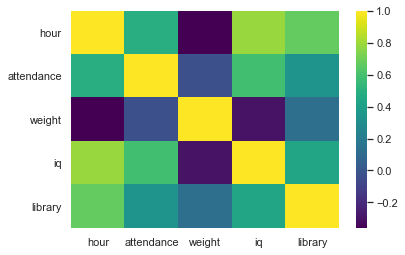

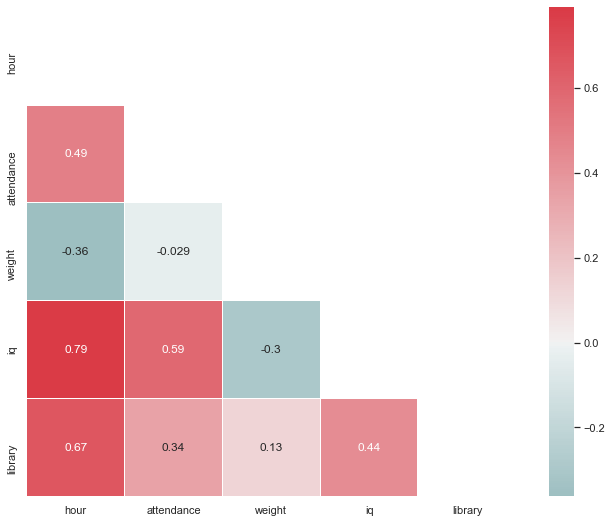

In [21]:
sns.heatmap(corr, cmap='viridis')
plt.show();

sns.set(style="white")
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(12,9))
cmap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,
            linewidths=0.5,cbar_kws={"shrink":1},annot=True);
#annot는 히트맵 안에 숫자 생성해주는 것
#글자 잘림은 subplots 사이즈 등 조절하면 쉽게 조절 가능

### 연관 분석

분석용 데이터는 해당 사이트에서 구하였습니다.

https://tjansry354.tistory.com/10

해당 데이터를 가공하였던 설명입니다.

----------------------------------------------

연관분석 함수를 쓰려면 DataFrame을 list로 만들어야합니다.

그럼 다른 데이터는 지우고, item_name을 order_id에 따라 그룹짓도록 하겠습니다.

order_id가 1834까지 있기 때문에, 리스트의 크기를 1835로 해서 2차원 리스트를 만듭니다.

order_id가 1부터 시작이다 보니, 0은 null값으로 들어갔군요. pop()으로 제거하고 계속하겠습니다.

그리고 한테이블에 같은 메뉴를 다수로 시킨 경우도 있으니, 중복값을 제거하는 set()도 사용합니다.

In [31]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df1 = pd.read_csv("chipotle.tsv",error_bad_lines=False, sep='\t')

df_tmp=df1[['order_id','item_name']]
df_tmp_arr=[[]for i in range(1835)]
num=0
for i in df_tmp['item_name'] :
    df_tmp_arr[df_tmp['order_id'][num]].append(i)
    num+=1
    
df_tmp_arr.pop(0)
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))
    num+=1
df_tmp_arr[0]

['Izze',
 'Chips and Tomatillo-Green Chili Salsa',
 'Nantucket Nectar',
 'Chips and Fresh Tomato Salsa']

In [32]:
te = TransactionEncoder()
#주어진 코드에서 fit 함수를 통해 dataset은 고유한 라벨을 갖게 되고 , 
#transform함수를 통해서 파이썬 리스트를 one-hot 인코딩 된 numPy 배열로 변환합니다.
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr) 
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.083969,(Bottled Water)
1,0.051254,(Canned Soda)
2,0.150491,(Canned Soft Drink)
3,0.335333,(Chicken Bowl)
4,0.266630,(Chicken Burrito)
5,0.053435,(Chicken Salad Bowl)
6,0.058342,(Chicken Soft Tacos)
7,0.113413,(Chips)
8,0.059978,(Chips and Fresh Tomato Salsa)
9,0.258451,(Chips and Guacamole)


apriori에 가공된 데이터를 넣고 최소한의 support를 지정해주면 위와 같은 결과가 나온다

여기서 쉼표로 구분이 없는 것들은 연관성의 메인은 아니고

조건절과 결과절을 연결 할 수 있는 것은 쉼표가 있는 것들이다.

antecedents : 조건절

consequents : 결과절

→만일 (조건절)이라면 (결과절)

lift가 1이면 두 항목은 독립

1보다 크면 양의 상관관계, 1보다 작으면 음의 상관관계(우연보다 낮은 확률)

In [64]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985


In [69]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
4,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
5,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
6,(Chips and Guacamole),(Chicken Burrito),0.258451,0.266630,0.062159,0.240506,0.902022,-0.006752,0.965603
7,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979


### t검정

t검정은 3종류로 하나의 표본이 특정 값과 차이가 있는지 없는지를 검증하는 단일표본 t 검정

두 집단간의 차이가 있는지 검증하는 독립표본 t 검정 (A그룹 약 복용 / B그룹 약 미 복용)

한 집단의 전과 후를 비교하는 대응표본 t 검정으로 나뉩니다. (A그룹 약 복용 전 / B그룹 약 복용 후)

기본적으로 귀무가설은 표본과 해당 값은 차이가 없다, 두 집단은 차이가 없다, 해당 그룹의 전과 후는 차이가 없다 입니다.

In [22]:
dat_M = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
dat_F = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

stats.ttest_1samp(dat_M, 105) #일표본 t 검정

Ttest_1sampResult(statistic=-2.3501608059776435, pvalue=0.029721802204110182)

독립표본의 경우, 두 집단을 비교하는 stats.ttest_ind 함수 안에 equal_var 이라는 옵션이 있습니다.

바로, 두 집단이 등분산인지 이분산인지 표시를 해주는 옵션으로

이는 일원 분산 분석을 수행해서 결과를 확인 후 결정하면 됩니다.

In [26]:
print(stats.f_oneway(dat_M, dat_F)) # -> 검증결과 pvalue 0.01로 분산 다름 확인 완료

#독립표본 t검정
stats.ttest_ind(dat_M, dat_F, equal_var=False) #마지막 옵션은 분산 동일 여부

F_onewayResult(statistic=7.131964809384164, pvalue=0.011082895240510133)


Ttest_indResult(statistic=-2.670573872669349, pvalue=0.01108318824471652)

대응표본

In [27]:
stats.ttest_rel(dat_M, dat_F)

Ttest_relResult(statistic=-2.9868874599588247, pvalue=0.007578486289181322)